# <div align = center> Study on the effectiveness of Two Child Policy in Singapore </div>



## 1. Aims, objectives, and background
### 1.1	Introduction
This project was inspired with the recent news of roe v wade ruling by the supreme courts in USA. With US Supreme Courts overturning the ruling on abortion rights, it will be more difficult to manage the population. And this reminded me of the Two Child policy that was successful in Singapore in 1970. Thus, I want to do this project to learn more about population control in Singapore.

I want to explore the effectiveness of the Two Child policy that Singapore government have enforced to control the population and why was it so successful. 

I chose to focus on fertility rate in Singapore, the strategies that the government have used and their impacts. As far as I am aware, this topic has been explored in Singapore. So, if I am able to draw a similar conclusion with these papers, it means my methodologies are correct.
### 1.2	Aims & Objectives
Within this project, I would like to explore the following:
<ul>
<li>	Comparing trends of fertility rates in Singapore and the world</li>
<li>	Look for relationships between the trends above to the published policies</li>
<li>Impacts of the two-child policy on fertility rates</li>
<li>Analyzing articles on the policy</li>
    <ul></li>
<li>Why was it so successful?</li>
<li>What are the government attempt to reverse it?</li>
    </ul>
</ul>
For this project proposal, my aims are to:
<ol>
<li>	Decide how much data is required to sufficiently explore the above areas, taking into consideration constraints on time and resource.</li>
<li>	Decide which data and articles should be used to allow for a coherent analysis</li>
<li>	Collect the data via web scraping and store in a form which allows for data cleaning and analysis</li>
<li>	Clean and transform the data such that it is suitable for use in the techniques I would like to utilize later</li>
<li>	Carry out some exploratory data analysis to identify that there are trends within the data which make it viable for further exploration</li>
<ol>

## 2.	Data
### 2.1	Data choices
I have chosen two set of data on the fertility/birth rates in Singapore and an article about Two Child policy. I decided to do this is because I want to ensure that the two set of data are cleaned properly by comparing them directly and explore the similarity. It will give me a better understand of the situation in Singapore. 

I will then use the articles as a case study to study their reasoning as to why Two Child policy was successful, Singapore government current campaign to tackle the declining birthrates in Singapore.

### 2.2	Choice of data: Methodology
The raw data that I have chosen came from two different sources. The data date ranges from 1970 onwards which is the range when the Two Child policy was enforced and ended.

The first set of data came locally from the Singapore Government

The second set of data came from The World Bank data

This implies that there is diversity in the data collected and the information is less bias as the sources are from local and international.

While the article I have chosen was published locally in Singapore, where one is public publisher.
### 2.3	Limitations
#### 2.3.1	Time Constraint 
Time constraint was one of the limitations I faced in this project as I was unable to collect data on the income rates or GPD to see the extend of the impact on Singapore economy. I was unable to do a more elaborate analysis on the data. If I have more time, I will be able to do more in depth analysis on different data area like the happiness level, fertility rate at different income level and so on.
#### 2.3.2	Difference in time 
The article I used was at least 4 years old as it was published at the time when two child policy have ended and the other campaign by government is still in effect. However, this could mean that the information can be reliable as when I was searching for articles, no new information was found that replaced these articles.
#### 2.4	Ethics of use of Data:
Due to this being an education research paper, most of the use of data here were appropriate.
With the first set of data from data.gov.sg, was open to the public and is licensed by Singapore Open Data License. With the rights to do analysis on this set of data if I credit them [6].

While the second set of data from the world bank data is also open to the public and is licensed by Creative Commons Attribution 4.0 (CC-BY 4.0) [5]. More info of their license can be found on their website.

And the article is under Fair Use, Copyright Disclaimer under section 107 of the Copyright Act 1976, allowance is made for “fair use” for purposes such as criticism, comment, news reporting, teaching, scholarship, education, and research. Fair use is a use permitted by copyright statute that might otherwise be infringing. Thus, all sources will be credited in references.



# The libraries and modules i will be using:

In [164]:
# Import libraries and modules
import pandas as pd
import csv
from bs4 import BeautifulSoup
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()


## 3.	Web Scraping

I will be using the data API provided by <a href = "https://data.gov.sg/dataset/births-and-fertility-annual?resource_id=55f8c651-6c18-4017-b1f4-f4c4b65785e2"> data.gov.sg</a>. This data initially includes the Gross reproduction rate, Total fetility Rates and Net Reproduction Rate in Singapore from 1960 to 2018. However I only needed the data from the Total fertility rates over those years, so I have to learn to use the website <a href = "https://data.gov.sg/api/3/action/help_show?name=datastore_search">data search API </a>. I researched and learned about the CKAN API that was being used by the website, where i had to increase the search limit from the default 5 to 177 which is the full dataset by changing &limit=177, and to limit the search to only Total fertility rate, i had to query to the database using &q=Total%20Fertility%20Rate. Thus, i was able to filter out the results i needed and clean the data i collect, getting rid of information i didnt need.

In [43]:
#Funtion to put together the API query
def getRequestUrl():
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=55f8c651-6c18-4017-b1f4-f4c4b65785e2&limit=177&q=Total%20Fertility%20Rate"
    return url
#Function to call the API with the given query URL
def getAPiData(requestUrl):
    #Call the API
    response = requests.get(requestUrl)
    
    #Extract the text from the response
    data = json.loads(response.text)
    
    #Get the actual data
    results = data["result"]["records"]
    
    return results

#Get the data
requestUrl = getRequestUrl()
results = getAPiData(requestUrl)
df = pd.DataFrame(results)
df

,_full_count,rank,value,year,_id,level_1
0,59,0.089668,5.76,1960,1,Total Fertility Rate
1,59,0.089668,5.41,1961,4,Total Fertility Rate
2,59,0.089668,5.21,1962,7,Total Fertility Rate
3,59,0.089668,5.16,1963,10,Total Fertility Rate
4,59,0.089668,4.97,1964,13,Total Fertility Rate
5,59,0.089668,4.66,1965,16,Total Fertility Rate
6,59,0.089668,4.46,1966,19,Total Fertility Rate
7,59,0.089668,3.91,1967,22,Total Fertility Rate
8,59,0.089668,3.53,1968,25,Total Fertility Rate
9,59,0.089668,3.22,1969,28,Total Fertility Rate


## Cleaning of data
I will clean my data by traversing through the data to try and find if inside my there are any null or empty value, if there are an error message will be sent to me and the position where the error is found. If there are none it will also inform me as seen bellow.

In [44]:
Error = False
for index in range(len(df["year"])):
    if df["year"][index] == None:
        Error = True
        print("Error found at" ,index, " under Year ")
for index in range(len(df["level_1"])):
    if df["level_1"][index] == None:
        Error = True
        print("Error found at" ,index, " under level_1 ")
for index in range(len(df["value"])):
    if df["value"][index] == None:
        Error = True
        print("Error found at" ,index, " under Value ")      
if not Error :
    print ("No error was found in the data")

No error was found in the data


## Transform Data
I need to organise and clean the dataset again in order to collect only the year, value and name. Since the data is already sorted by years from smallest to largest i will not use .sort here.

In [45]:
df1 = df.loc[:,("year",  "value")]
#df1.set_index("year", inplace= True)
print(df1)

    year value
0   1960  5.76
1   1961  5.41
2   1962  5.21
3   1963  5.16
4   1964  4.97
5   1965  4.66
6   1966  4.46
7   1967  3.91
8   1968  3.53
9   1969  3.22
10  1970  3.07
11  1971  3.02
12  1972  3.04
13  1973  2.79
14  1974  2.35
15  1975  2.07
16  1976  2.11
17  1977  1.82
18  1978  1.79
19  1979  1.79
20  1980  1.82
21  1981  1.78
22  1982  1.74
23  1983  1.61
24  1984  1.62
25  1985  1.61
26  1986  1.43
27  1987  1.62
28  1988  1.96
29  1989  1.75
30  1990  1.83
31  1991  1.73
32  1992  1.72
33  1993  1.74
34  1994  1.71
35  1995  1.67
36  1996  1.66
37  1997  1.61
38  1998  1.48
39  1999  1.47
40  2000   1.6
41  2001  1.41
42  2002  1.37
43  2003  1.27
44  2004  1.26
45  2005  1.26
46  2006  1.28
47  2007  1.29
48  2008  1.28
49  2009  1.22
50  2010  1.15
51  2011   1.2
52  2012  1.29
53  2013  1.19
54  2014  1.25
55  2015  1.24
56  2016   1.2
57  2017  1.16
58  2018  1.14


Saving a backup file in case of errors.

In [30]:
df1.to_csv("Backup Data 1.csv")

# Data 2 
This was the file i downloaded from <a href = "https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?end=2020&locations=SG&start=1960&view=chart">The World Bank Data</a> and i am converting it into python so i can clean the data and analyze it. Firstly, i needed to remove the empty data from the first 3 row in the csv so that panda modules will be able to read it.


From the data, I am able to delete the collums i didnt need by using .drop form panda dataframe. In addition, i was able to seperate the data of fertility rate in Singapore and the World using .loc.

### Fertility Rate in Singapore

In [103]:
df2 = pd.read_csv("Data 2.csv")
#Remove the indicator Name and code from the data.
df2.drop(["Indicator Name", "Indicator Code"], axis = 1, inplace = True)
d2fSGP = df2.loc[(df2 ["Country Code"] == "SGP")]
d2fWLD = df2.loc[(df2 ["Country Code"] == "WLD")]
#Export as CSV for manipulation
d2fSGP.to_csv("Data 2 Singapore.csv")
d2fSGP

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
208,Singapore,SGP,5.76,5.41,5.21,5.16,4.97,4.66,4.46,3.91,...,1.2,1.29,1.19,1.25,1.24,1.2,1.16,1.14,1.14,1.1


### Fertility Rate World Wide

In [91]:
#Export as CSV for manipulation
d2fWLD.to_csv("Data 2 WorldWide.csv")
d2fWLD

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,World,WLD,4.979299,5.003564,5.025367,5.045551,5.05647,5.040687,4.992085,4.973276,...,2.534292,2.516385,2.498638,2.488924,2.472314,2.464809,2.455432,2.444857,2.427315,2.414952


### Data Manipulation
I will modify the Data 2 Singapore and World Wide 2 CSV data so i am able to produce the appropriate dataframe and plot the necessary graphs. I have deleted the first 3 collums in the data and added Year and Value row respectively, then i transpose the table using excel <a href = "https://support.microsoft.com/en-us/office/transpose-data-from-rows-to-columns-or-vice-versa-in-excel-for-mac-9c16dd55-ed1a-4aa2-8b74-b1b9211e2ede">[9]</a>.

From my observations, the data 1 and data of world wide only range from 1960 to 2018. Thus, i will be removing data from 2018-2020 in the data 2 for Singapore through the use of excel.


In [141]:
df2SGP = pd.read_csv("Data 2 Singapore.csv")
df2WLD = pd.read_csv("Data 2 WorldWide.csv")
#Dataframe of fertility rate in SG
df2SGP

,Year,Value
0,1960,5.76
1,1961,5.41
2,1962,5.21
3,1963,5.16
4,1964,4.97
5,1965,4.66
6,1966,4.46
7,1967,3.91
8,1968,3.53
9,1969,3.22


In [133]:
#Dataframe of fertility World Wide
df2WLD

,Year,Value
0,1960,4.979299
1,1961,5.003564
2,1962,5.025367
3,1963,5.045551
4,1964,5.056470
5,1965,5.040687
6,1966,4.992085
7,1967,4.973276
8,1968,4.922089
9,1969,4.855976


# Data Validation & Analysis
I will be comparing the mean values and the fertility rate in 1960 and 2018 (as the data 1 only contains til 2018). If the data are similar, i will be able to conclude that the data between two sources are reliable and valid.</br> 

To perform any data analysis, my data inside my dataframe have to be converted to a float type for pandas.dataframe, as it does not recognise string for plot and string is the default format for this dataframe. I used the guide from [7] to peform this.


In [148]:
df1 = df1.astype(float)
df2SGP = df2SGP.astype(float)
df2WLD = df2WLD.astype(float)

I will be using describe function from pandas modules to find out the min, max, mean, meadian, etc of the fertility rate from the 3 dataframes and compare them.

In [175]:
#data 1
df1["value"].describe()

count    59.000000
mean      2.165424
std       1.251469
min       1.140000
25%       1.290000
50%       1.710000
75%       2.230000
max       5.760000
Name: value, dtype: float64

In [176]:
#data 2 singapore
df2SGP["Value"].describe()

count    59.000000
mean      2.165424
std       1.251469
min       1.140000
25%       1.290000
50%       1.710000
75%       2.230000
max       5.760000
Name: Value, dtype: float64

From observing the datas from two different sources, i found that they are exactly the same in their mean values, min values and max value. Therefore, the two set of data i have collected are the same and they are reliable despite coming from different sources.


In [179]:
#data 2 WorldWide
df2WLD["Value"].describe()

count    59.000000
mean      3.478904
std       0.930136
min       2.414952
25%       2.616858
50%       3.324495
75%       4.222830
max       5.056470
Name: Value, dtype: float64

From the above, I was able to observe that:
<UL>
    <LI>The Mean fertility rate World Wide is higher than Singapore (3.478904> 2.165424)
    <LI>Singapore have a higher standard deviation in its fertility rate(1.251469 > 0.930136)
    <LI>Singapore have a higher max value than the World (5.76 > 5.056470)
    <LI>Singapore have a lower min value than the World (1.140000 < 2.414952)
    <LI>Singapore have a lower percentiles (25, 50, 75) than the World       
</UL>

This implies that, Singapore have a great decline in the fertility rate compare to the World and is continuing to go down further. Bellow with the graphs, i will be able to explore more indepth of the trends.

## 4.	Exploratory Data Analysis
### 4.1	Article Analysis
From reading the article by MotherShip [4], I was able to draw many learning points which will help me analyze the data I collected. The two-child policy ran from 1972 to 1987, a total of 15 years.
#### 4.1.1	Start of the campaign
“The National Family Planning Programme (NFPP) was rolled out in 1966 after the government set up the Singapore Family Planning and Population Board (SFPPB) in January 1966.”

The campaign “Stop at Two” started in 1970, with the aim to achieve “To reduce the number of births to achieve zero population growth. In essence, having the same number of births and deaths.”

Posters:
![Posters](Picture1.jpg)

#### 4.1.2	Why Two Child
As it was post-war and peaceful era, people started to settle down and make a family. With many families wanting three children or more. About 30% of the female population, was not on the family planning services provided by the government. Thus, the authorities chose to limit to two children as “It was based on calculations that this limit will ultimately result in the population reaching the replacement fertility rate (TFR) of 2.1 children”.
#### 4.1.3	 Campaign
These were the main points from the article:
<ul>
<li>Reduction of income tax relief to cover only the first three children.</li>
<li>Government hospitals increased their fees for giving birth.</li>
<li>Waiver of birth fees and other fees for the fourth child if either husband or wife underwent sterilisation.</li>
<li>Reduction of paid maternity leave from three to two confinements</li>
<li>Lower priority for larger families who are waiting for Housing and Development Board (HDB) flats.</li>
<li>The Abortion Act was amended in 1974 to allow for easier abortions</li>
<li>The Voluntary Sterilisation Act was enacted also in 1974 to allow women to undergo sexual sterilisation for non-medical reasons.</li>
<li>Parents who undergo sterilisation received reimbursement for their delivery fees and priority in school enrolment.</li>
</ul>

#### 4.1.4	Why it was so successful?
The ideal and message from the campaign became a stigma in society where big families would be looked down upon. As more women received an education and joined the workforce, a direct correlation was a decrease in birth rates. Transferring people from sprawling communal living to small HDB units also caused people to rethink their family size. Big extended families were no longer feasible in small flats. Resulting the success of the Two Child Policy.

# Graph Plotting & Analysis


## <div align = "center">Data 1 Graph</div>

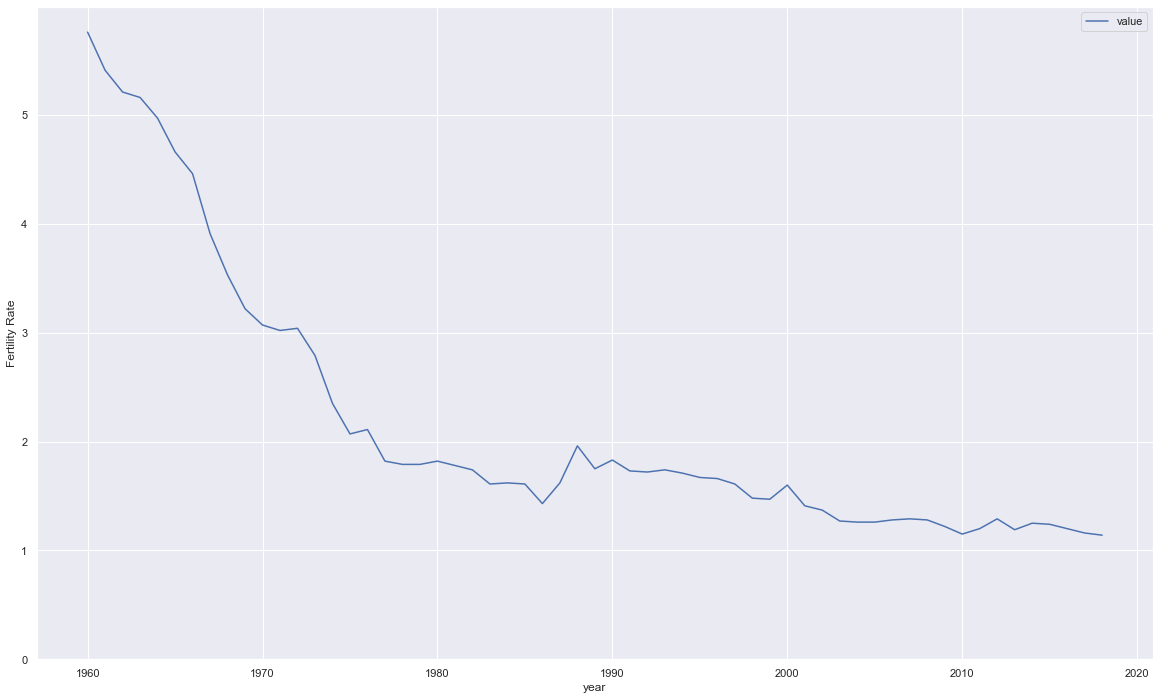

In [180]:
df1.plot(kind="line", x="year", y ="value", figsize=(20,12))
plt.ylabel("Fertility Rate")
plt.ylim(0,)
plt.show()

## <div align = "center">Data 2 Singapore Graph</div>

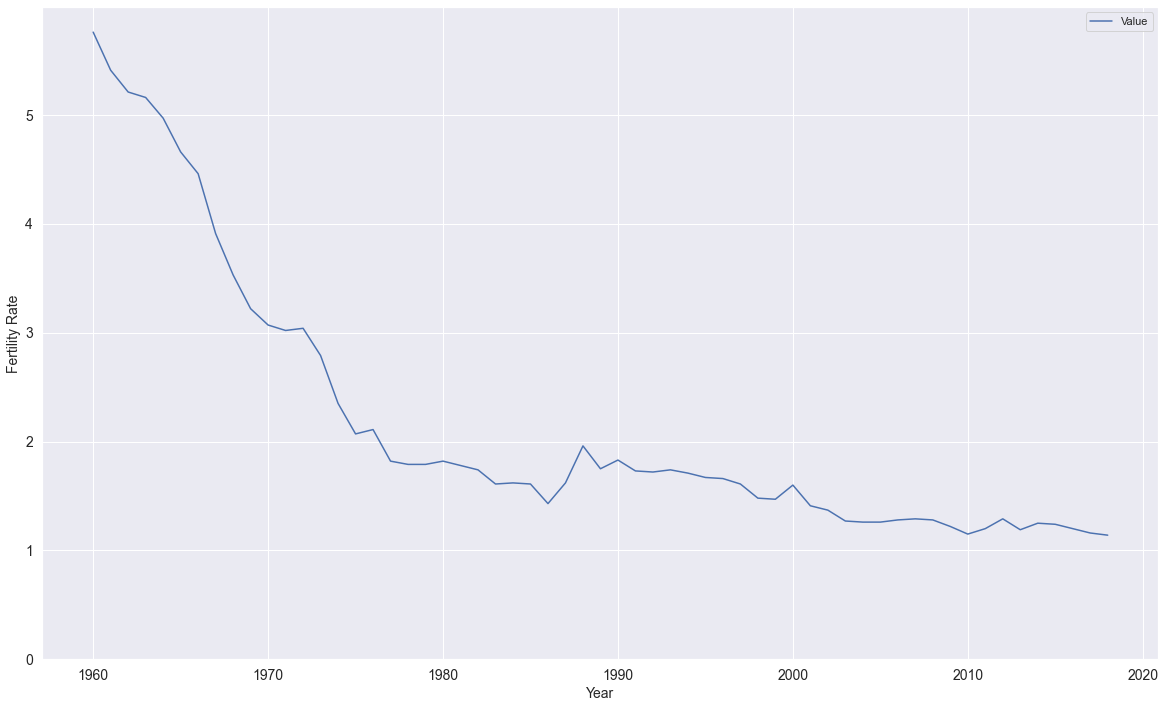

In [162]:
df2SGP.plot(kind="line", x="Year", y ="Value", figsize=(20,12))
plt.ylabel("Fertility Rate")
plt.ylim(0,)
plt.show()

From data 1 graph and data 2 Singapore graph, it seems that they are near identical so i will consider them as the fertility rate in Singapore.

## <div align = "center">Data 2 World Wide Graph</div>

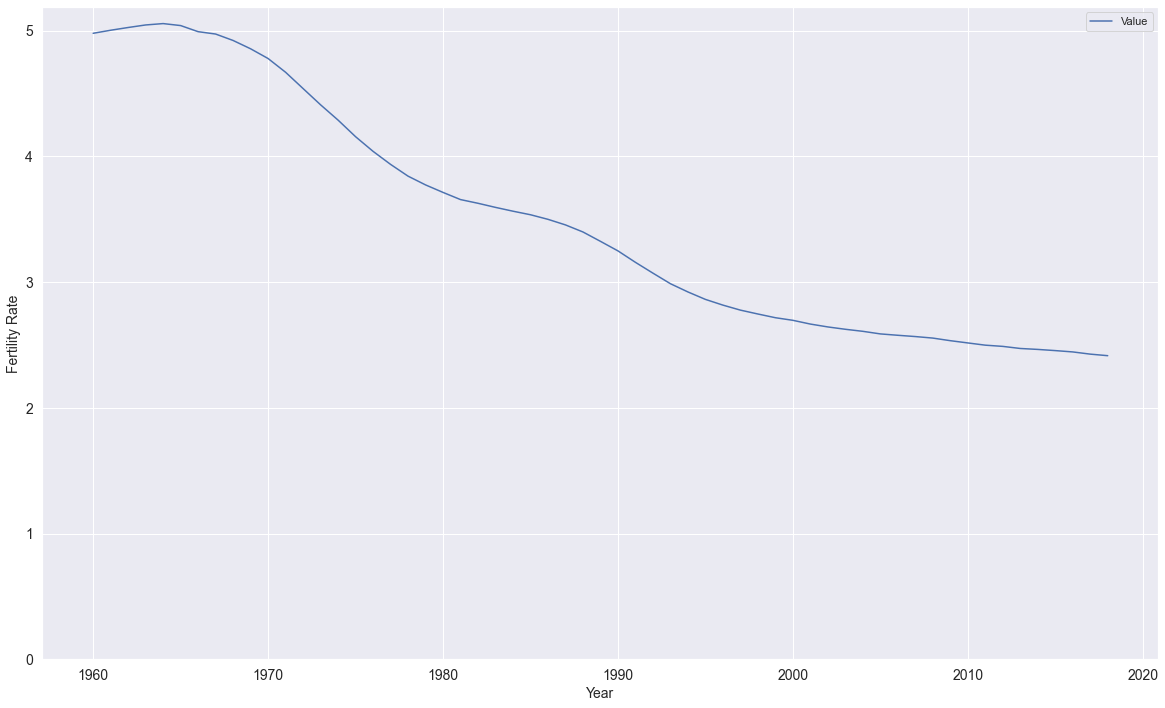

In [163]:
df2WLD.plot(kind="line", x="Year", y ="Value", figsize=(20,12))
plt.ylabel("Fertility Rate")
plt.ylim(0,)
plt.show()

Generally, all the graphs saw a downward trends on the fertility rates over the past 58 years.


I can see that there is a rapid downward trend from Singapore graph from 1970 to 1985 which is also the period when the Two Child Policy was implemented. This inform us that the policy was successful as it was able to bring down the birth rates from around 3.0 to 1.82. This means that each family are having at least one child and stopping at two children which is inline with the objective of the campaign mentioned in 4.1. This proves that the Two Policy policy was successful in reducing the fertility rates in Singapore. Comparing it to the World Wide graph, Singapore was much more rapid as by 1980, the World fertility rate was 3.7 per women while Singapore was at 1.82. 

After the Two Child policy, we could observe that theres a spike in fetility rate which would mean that the campaign deploy by the government to increase fertility was slightly successful as the trend continue to go downwards until 2018. This proves that the Two Child Policy had lingering effects onto our society as many people could still be consider having big families as a bad things although there are many benefits given by the government. Therefore, the Two Child policy was successful in reducing the fertility rate in Singapore but it was so impactful that the Singapore government was unable to reverse its effect.

## 5.	Conclusion
Through the exploratory data analysis, I have been able to learn that Two Child Policy was insanely successful and easy to accomplish. However, it left a great impact on Singapore birth rate where the fertility rates in Singapore was and still declining rapidly. To tackle this, Singapore government have tried multiple campaign to reverse its effect but were not successful as we can see from the trends.

Within this project, it would be more useful to explore the impact on the economy and the ratio of Singaporeans to foreigner. As the current methods will only give us one side of the answer. I also think that if I had more time, I will be able to collect all the posters, interviews during the Two Child policy period and create a wordcloud that contain words that have influenced the mindset of society.


## 6.	References 
[1] 	GOV, S. G. (2016, February 29). Births and fertility, annual. Data.gov.sg. Retrieved June 26, 2022, from https://data.gov.sg/dataset/births-and-fertility-annual?resource_id=55f8c651-6c18-4017-b1f4-f4c4b65785e2 

[2] 	The World Bank. (n.d.). Fertility rate, total (births per woman) - Singapore. Data. Retrieved June 26, 2022, from https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?locations=SG 

[3] 	CNA. (2022, June 24). US Supreme Court overturns landmark Roe v Wade Abortion ruling. CNA. Retrieved June 26, 2022, from https://www.channelnewsasia.com/world/us-supreme-court-overturns-roe-wade-abortion-rights-decision-2769261 

[4]	Lee , J. (2018, May 30). Getting s'poreans to 'stop at two' children was easy. have more children? that's tough. Mothership.SG - News from Singapore, Asia and around the world. Retrieved June 26, 2022, from https://mothership.sg/2018/05/singapore-stop-at-two-children-campaign-successful/ 

[5] 	Data Access and licensing. Data Access And Licensing. (n.d.). Retrieved June 26, 2022, from https://datacatalog.worldbank.org/public-licenses#cc-by 

[6]	Singapore Open Data Licence. Data.gov.sg. (n.d.). Retrieved June 26, 2022, from https://data.gov.sg/open-data-licence 

[7]	How to convert strings to floats in pandas DataFrame. Data to Fish. (2021, July 3). Retrieved June 27, 2022, from https://datatofish.com/convert-string-to-float-dataframe/ 

[8]	Pandas documentation¶. pandas documentation - pandas 1.4.3 documentation. (n.d.). Retrieved June 27, 2022, from https://pandas.pydata.org/pandas-docs/stable/index.html 

[9]	Microsoft. Microsoft Support. (n.d.). Retrieved June 27, 2022, from https://support.microsoft.com/en-us/office/transpose-data-from-rows-to-columns-or-vice-versa-in-excel-for-mac-9c16dd55-ed1a-4aa2-8b74-b1b9211e2ede 

